In [13]:
import pandas as pd
import numpy as np
import scipy.stats as sp
from itertools import combinations
import matplotlib.pyplot as plt
import re

In [14]:
# Importando o dataset
file_path = pd.read_csv('./paises_europa/tabela_paises.csv')
df = pd.DataFrame(file_path)
df.head() # Mostrando as primeiras linhas do dataset

,Mes/Ano,Alemanha,Estonia,Finlandia,Grecia,Suecia
0,Jan/2020,1.6,1.6,1.2,1.1,1.5
1,Fev/2020,1.7,2.0,1.1,0.4,1.3
2,Mar/2020,1.3,1.0,0.9,0.2,0.8
3,Abr/2020,0.8,-0.9,-0.3,-0.9,-0.2
4,Mai/2020,0.5,-1.8,-0.1,-0.7,0.1


In [15]:
# Converter Mes/Ano para Data da Tabela
df['Mes'] = df['Mes/Ano'].str.split('/').str[0]
df['Ano'] = df['Mes/Ano'].str.split('/').str[1]
df.drop(columns=['Mes/Ano'], inplace=True)

# Converter colunas de inflação para valores numéricos
for column in df.columns:
    if column not in ['Ano']:
        df[column] = pd.to_numeric(df[column], errors='coerce')

    # Calcular a média de cada país por ano
df = df.groupby('Ano').mean()
df.reset_index(inplace=True)
        

df.head()

,Ano,Alemanha,Estonia,Finlandia,Grecia,Suecia,Mes
0,2020,0.358333,-0.616667,0.400000,-1.250000,0.658333,NaN
1,2021,3.225000,4.491667,2.075000,0.583333,2.650000,NaN
2,2022,8.633333,19.375000,7.158333,9.291667,8.033333,NaN
3,2023,6.108333,9.433333,4.391667,4.200000,5.983333,NaN


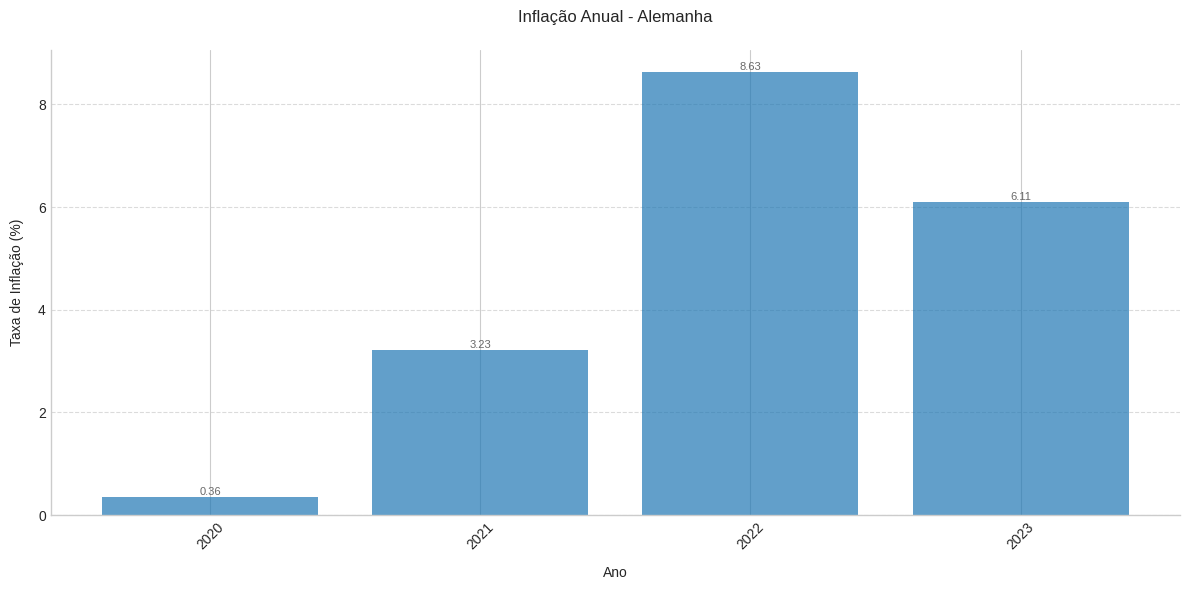

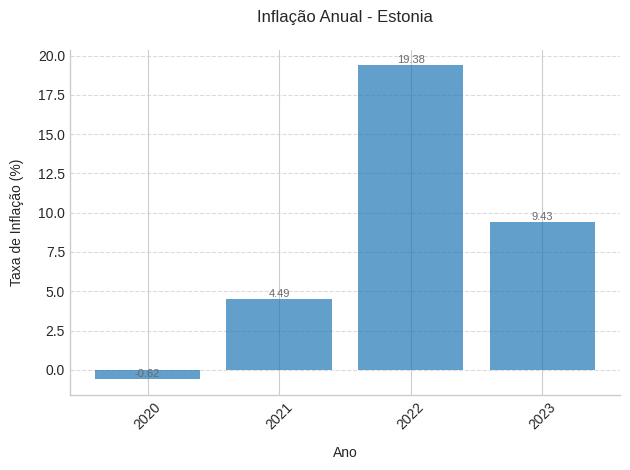

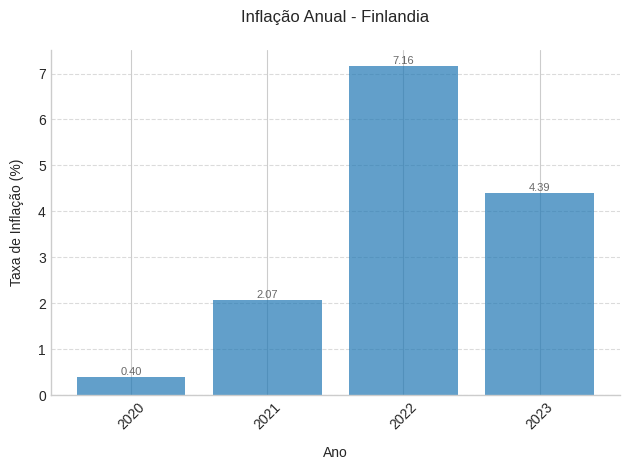

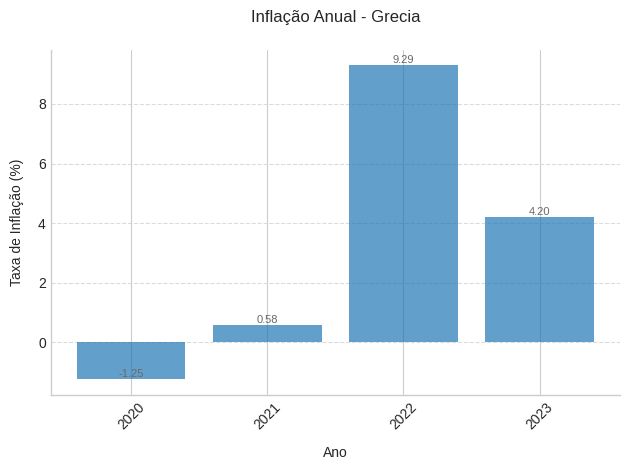

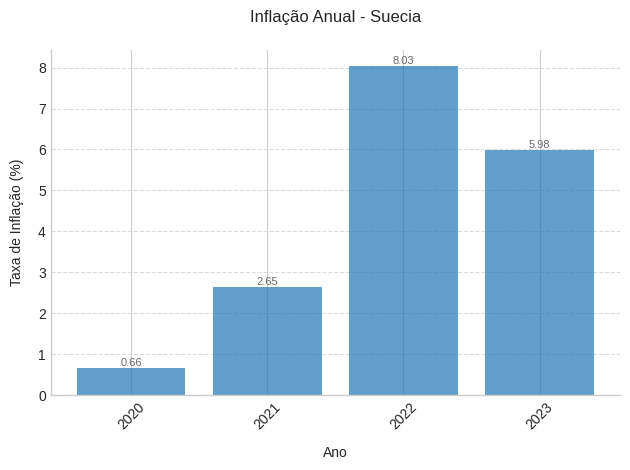

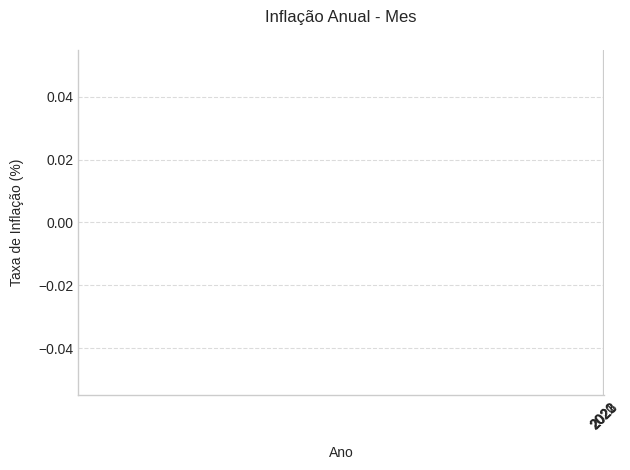

In [22]:
import matplotlib.pyplot as plt

# Configurar estilo e tamanho dos gráficos
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 6))

# Gerar gráfico de barras para cada país
for column in df.columns:
    if column != 'Ano':
        # Criar gráfico de barras
        ax = plt.subplot()
        bars = ax.bar(df['Ano'], df[column], label=column, alpha=0.7)
        
        # Adicionar valores nas barras
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}',
                    ha='center', va='bottom',
                    fontsize=8, color='dimgray')
        
        # Personalizar layout
        plt.title(f'Inflação Anual - {column}', pad=20)
        plt.xlabel('Ano', labelpad=10)
        plt.ylabel('Taxa de Inflação (%)', labelpad=10)
        plt.xticks(df['Ano'], rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        # Remover bordas
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        plt.tight_layout()
        plt.show()